# Python Final Project - Airbnb

Our Project goal is to analyze Airbnb data to help the stakeholder to have a better understanding of data relating to the price of listings on their website.

### Import the python library

In [1]:
import numpy as np
import os
import pandas as pd
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
sns.set(style="darkgrid", font_scale=1.2)
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.display.max_columns = None
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,lars_path,LassoCV,RidgeCV
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

## Import and review the Dataset

In [3]:
url='http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-12-05/data/listings.csv.gz'
df = pd.read_csv(url)

In [4]:
df.head(5)

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20211205213126   2021-12-06   
1  20168  https://www.airbnb.com/rooms/20168  20211205213126   2021-12-06   
2  27886  https://www.airbnb.com/rooms/27886  20211205213126   2021-12-06   
3  28871  https://www.airbnb.com/rooms/28871  20211205213126   2021-12-06   
4  29051  https://www.airbnb.com/rooms/29051  20211205213126   2021-12-06   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1       Studio with private bathroom in the centre 1   
2  Romantic, stylish B&B houseboat in canal district   
3                            Comfortable double room   
4                            Comfortable single room   

                                         description  \
0  Quiet Garden View Room & Super Fast WiFi<br />...   
1  17th century Dutch townhouse in the heart of t...   
2  Stylish and romantic houseboat on fantastic hi...   
3  <b>The space</b><br />In a monumental house ri...   
4  This room can also accomodate 2 people.  For a...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1  Located just in between famous central canals....   
2         Central, quiet, safe, clean and beautiful.   
3       Flower market , Leidseplein , Rembrantsplein   
4  the street is quite lively especially on weeke...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159   
1  https://a0.muscache.com/pictures/69979628/fd6a...    59484   
2  https://a0.muscache.com/pictures/02c2da9d-660e...    97647   
3  https://a0.muscache.com/pictures/160889/362340...   124245   
4  https://a0.muscache.com/pictures/162009/bd6be2...   124245   

                                   host_url  host_name  host_since  \
0    https://www.airbnb.com/users/show/3159     Daniel  2008-09-24   
1   https://www.airbnb.com/users/show/59484  Alexander  2009-12-02   
2   https://www.airbnb.com/users/show/97647       Flip  2010-03-23   
3  https://www.airbnb.com/users/show/124245      Edwin  2010-05-13   
4  https://www.airbnb.com/users/show/124245      Edwin  2010-05-13   

                               host_location  \
0  Amsterdam, Noord-Holland, The Netherlands   
1  Amsterdam, Noord-Holland, The Netherlands   
2  Amsterdam, Noord-Holland, The Netherlands   
3  Amsterdam, Noord-Holland, The Netherlands   
4  Amsterdam, Noord-Holland, The Netherlands   

                                          host_about host_response_time  \
0  Upon arriving in Amsterdam, one can imagine as...     within an hour   
1                  + (Phone number hidden by Airbnb)                NaN   
2  Marjan works in "eye" the dutch filmmuseum, an...     within an hour   
3                                                 Hi     within an hour   
4                                                 Hi     within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 t   
1                NaN                  NaN                 f   
2               100%                 100%                 t   
3               100%                 100%                 t   
4               100%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/3159/profile_...   
1  https://a0.muscache.com/im/pictures/user/65092...   
2  https://a0.muscache.com/im/users/97647/profile...   
3  https://a0.muscache.com/im/pictures/user/9986b...   
4  https://a0.muscache.com/im/pictures/user/9986b...   

                                    host_picture_url   host_neighbourhood  \
0  https://a0.muscache.com/im/users/3159/profile_...       Indische Buurt   
1  https://a0.muscache.com/im/pictures/user/65092...       Grachtengordel   
2  https://a0.muscache.com/im/use

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5556 non-null   int64  
 1   listing_url                                   5556 non-null   object 
 2   scrape_id                                     5556 non-null   int64  
 3   last_scraped                                  5556 non-null   object 
 4   name                                          5556 non-null   object 
 5   description                                   5545 non-null   object 
 6   neighborhood_overview                         3971 non-null   object 
 7   picture_url                                   5556 non-null   object 
 8   host_id                                       5556 non-null   int64  
 9   host_url                                      5556 non-null   o

By the understanding of data, from the dictionary in the Airbnb website, here we select the useful columns and drop these columns such as URL or reviews.

In [6]:
incl = ['id',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable']

df = df[incl]

## Explore Data
Explore data by analyzing the location and dispersion of relevant variables and process it as appropriate. For example, removing outliers, imputing null values, creating composite variables, or considering the logs of values.

### Data Transformation
Relpace the column from string to float and datatime

In [7]:
import re

# The price fields in our data frame 
price_list = ["price"]

                                       
for col in price_list:
    df[col] = df[col].str.replace('$','').str.replace(',','')
    df[col] = df[col].str.replace('%','').str.replace(',','')
    df[col] = pd.to_numeric(df[col])
    
# Change datatype of time to datatime
df['host_since'] = pd.to_datetime(df['host_since'])

In [8]:
df['host_is_superhost'] = df['host_is_superhost'].replace('t','T').replace('f','F')
df['instant_bookable'] = df['instant_bookable'].replace('t','True').replace('f','False')

### Removing outliers and Decreasing skewness

<AxesSubplot:ylabel='price'>

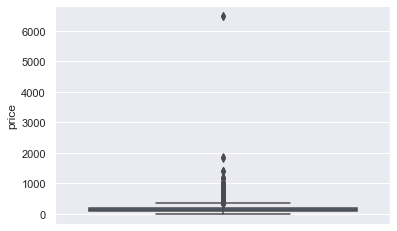

In [9]:
## Use a boxplot to check for high price values (outliers)
import seaborn as sns
sns.boxplot( y=df["price"] ) 

In [10]:
# Check skewness
df["price"].skew() 

20.58068603813029

In [11]:
# Check kurtosis
df["price"].kurtosis()

731.1887429092204

In [12]:
# Check distribution of column price
print(df["price"].quantile(0.9))

290.0


In [13]:
df["price"].describe()

count    5556.000000
mean      168.184665
std       167.458710
min         0.000000
25%        98.000000
50%       139.000000
75%       200.000000
max      6477.000000
Name: price, dtype: float64

In [14]:
# Dealing with outliers
# Remove all prices over the 90% percentile (or in order words, we keep all data rows under the 99.5% value of 1600)
df = df[df["price"]<df["price"].quantile(0.9)].reset_index(drop=True)

In [15]:
df["price"].skew()

0.500925713709259

<AxesSubplot:ylabel='price'>

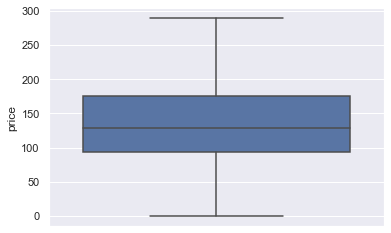

In [16]:
sns.boxplot( y=df["price"] ) 

Here we drop the outlier over 90% percentile and reduce the skewness value to 0.5.

### Imputing null values
For the columns missing over 25% of data, we choose to drop the whole columns.

<AxesSubplot:>

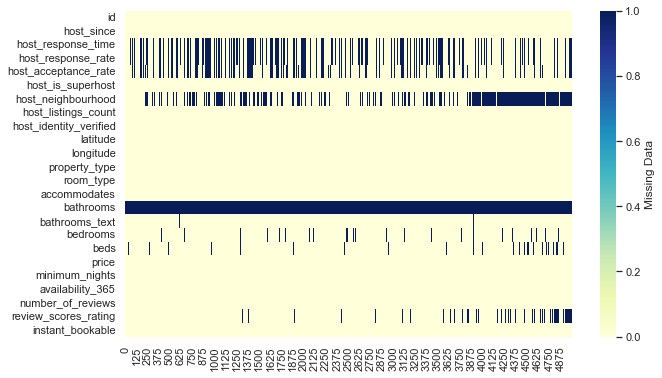

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [18]:
# Check missing values
df.isnull().sum()
max_number_of_nas = 5569*0.25 #remove attributes of columns of more than 30% of missing values
df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]

In [19]:
df.isnull().sum()

id                           0
host_since                   0
host_acceptance_rate      1350
host_is_superhost            0
host_listings_count          0
host_identity_verified       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              13
bedrooms                   321
beds                       234
price                        0
minimum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating       431
instant_bookable             0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      4999 non-null   int64         
 1   host_since              4999 non-null   datetime64[ns]
 2   host_acceptance_rate    3649 non-null   object        
 3   host_is_superhost       4999 non-null   object        
 4   host_listings_count     4999 non-null   int64         
 5   host_identity_verified  4999 non-null   object        
 6   latitude                4999 non-null   float64       
 7   longitude               4999 non-null   float64       
 8   property_type           4999 non-null   object        
 9   room_type               4999 non-null   object        
 10  accommodates            4999 non-null   int64         
 11  bathrooms_text          4986 non-null   object        
 12  bedrooms                4678 non-null   float64 

For the variable with int and float type, we fill the missing value with mean value.

In [21]:
# Missing data imputation
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['beds'] = df['beds'].fillna(round(df['beds'].mean()))

For the variable with object type, we fill the missing value with top value.

In [22]:
df['bathrooms_text'].describe()

count       4986
unique        19
top       1 bath
freq        2057
Name: bathrooms_text, dtype: object

In [23]:
df['bathrooms_text'] = df['bathrooms_text'].fillna('1 bath')

In [24]:
df['host_acceptance_rate'].str.replace('%','').dropna().astype(int).mean()

78.05234310770074

In [25]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('78%')

In [26]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%','').astype(int)

In [27]:
df.isnull().sum()

id                        0
host_since                0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
host_identity_verified    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
availability_365          0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
dtype: int64

### Creating composite variables

In [28]:
df['bathrooms_text'].unique()

array(['1.5 shared baths', '1 private bath', '1.5 baths', '1 shared bath',
       '1 bath', '2.5 baths', '0 baths', 'Private half-bath', '2 baths',
       '3 baths', '3.5 baths', '0 shared baths', '2 shared baths',
       'Shared half-bath', 'Half-bath', '3.5 shared baths',
       '3 shared baths', '4.5 baths', '4 baths'], dtype=object)

In [29]:
df['property_type'].unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Private room in houseboat', 'Entire rental unit',
       'Entire guest suite', 'Boat', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in residential home',
       'Private room in loft', 'Entire guesthouse',
       'Private room in boat', 'Private room in guest suite',
       'Entire townhouse', 'Room in boutique hotel',
       'Entire condominium (condo)', 'Entire residential home',
       'Private room in farm stay', 'Houseboat',
       'Room in bed and breakfast', 'Entire serviced apartment',
       'Entire chalet', 'Private room in guesthouse',
       'Shared room in rental unit',
       'Private room in condominium (condo)',
       'Shared room in residential home', 'Private room in island',
       'Entire villa', 'Private room in tiny house',
       'Private room in villa', 'Barn', 'Private room in bungalow',
       'Private room in serviced apartment', 'Entire cabin',
       'Roo

In [30]:
df['is_private_bath'] = df['bathrooms_text'].apply(lambda x: 1 if (x=='1 bath'or x=='1 private bath'or x=='1.5 baths' or x=='2 baths'or x=='2.5 baths' or x=='3 baths'or x=='3.5 baths' or x=='4 baths'or x=='4.5 baths' or x=='5 baths' or x=='Private half-bath') else 0)
df['property_type'] = df['property_type'].apply(lambda x: "Private" if 'Private' in x else x)
df['property_type'] = df['property_type'].apply(lambda x: "Entire" if 'Entire' in x else x)
df['property_type'] = df['property_type'].apply(lambda x: x if x == 'Private' or x == 'Entire' else "Other")

In [31]:
df = df.drop(['bathrooms_text'],axis=1)

### Analyzing the location

In [32]:
lats2018 = df['latitude'].tolist()
lons2018 = df['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

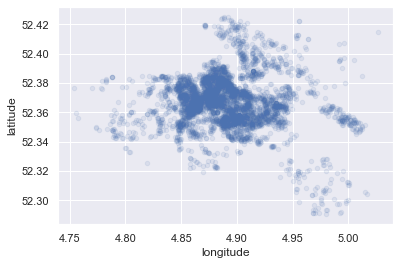

In [33]:
# Plot cordinates using 2D map(visualizing a map of the locations)
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [34]:
# Delete outliers according to the location
# Let's narrow our visual map and remove locations outside the main area
df_co = df[(df["longitude"]>4.8)&(df["latitude"]<52.4)].reset_index(drop=True)

df_co = df_co[df_co["latitude"]>52.32].reset_index(drop=True)

# And only look at locations under $500
df_co = df_co[df_co["price"]<500].reset_index(drop=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

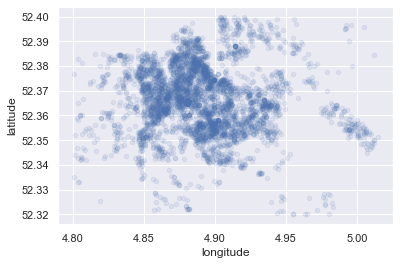

In [35]:
# Plot new 2D map
df_co.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

### Data visualizations and Dispersion of relevant variables

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      4999 non-null   int64         
 1   host_since              4999 non-null   datetime64[ns]
 2   host_acceptance_rate    4999 non-null   int64         
 3   host_is_superhost       4999 non-null   object        
 4   host_listings_count     4999 non-null   int64         
 5   host_identity_verified  4999 non-null   object        
 6   latitude                4999 non-null   float64       
 7   longitude               4999 non-null   float64       
 8   property_type           4999 non-null   object        
 9   room_type               4999 non-null   object        
 10  accommodates            4999 non-null   int64         
 11  bedrooms                4999 non-null   float64       
 12  beds                    4999 non-null   float64 

<AxesSubplot:xlabel='price', ylabel='Density'>

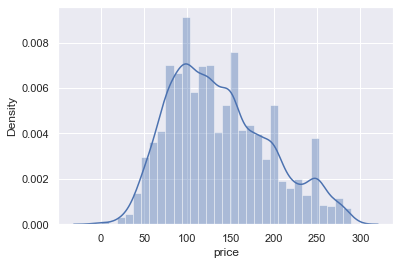

In [37]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='beds', ylabel='count'>

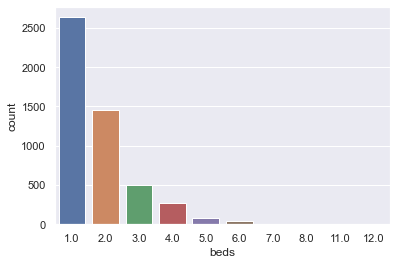

In [38]:
sns.countplot(x = 'beds', data = df)

<AxesSubplot:xlabel='host_listings_count', ylabel='count'>

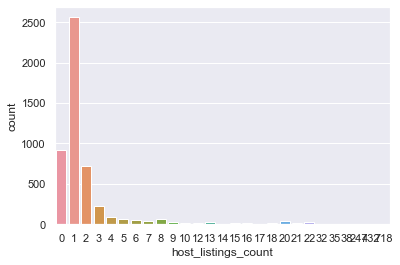

In [39]:
sns.countplot(x = 'host_listings_count', data = df)

<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

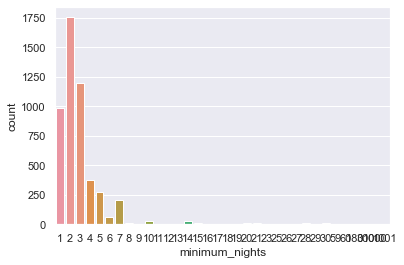

In [40]:
sns.countplot(x = 'minimum_nights', data = df)

<AxesSubplot:xlabel='availability_365', ylabel='Density'>

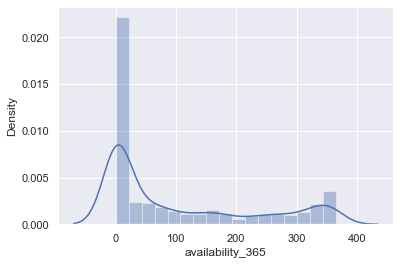

In [41]:
sns.distplot(df['availability_365'])

<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

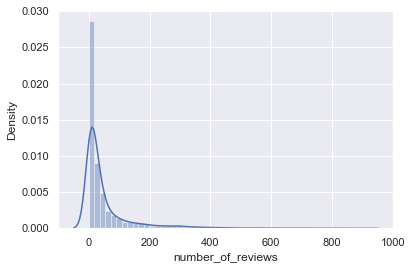

In [42]:
sns.distplot(df['number_of_reviews'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1209: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



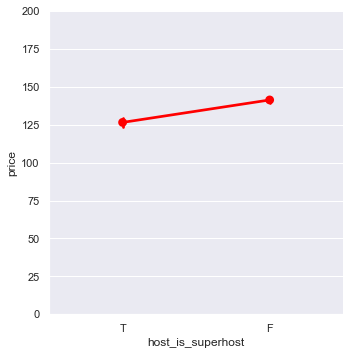

In [43]:
h = sns.PairGrid(data=df, x_vars=['host_is_superhost'], y_vars=['price'], size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 200))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1209: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



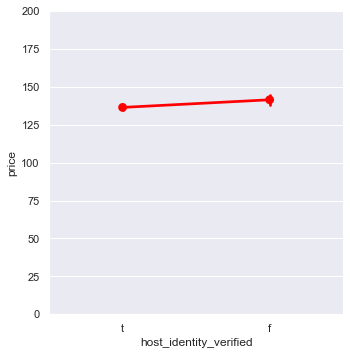

In [44]:
h = sns.PairGrid(data=df, x_vars=['host_identity_verified'], y_vars=['price'], size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 200))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1209: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



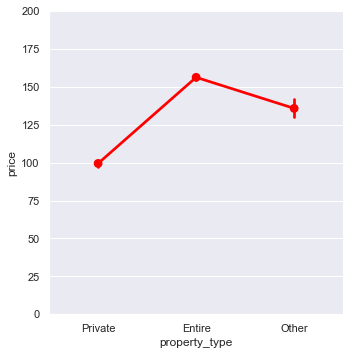

In [45]:
h = sns.PairGrid(data=df, x_vars=['property_type'], y_vars=['price'], size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 200))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1209: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



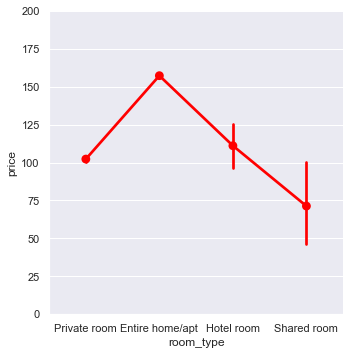

In [46]:
h = sns.PairGrid(data=df, x_vars=['room_type'], y_vars=['price'], size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 200))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1209: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



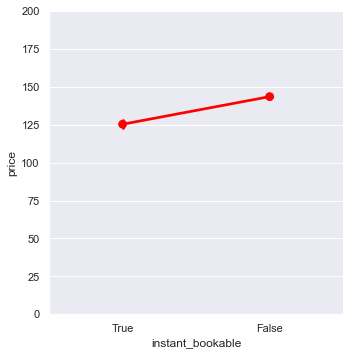

In [47]:
h = sns.PairGrid(data=df, x_vars=['instant_bookable'], y_vars=['price'], size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 200))

We visualize all the features vs. price or their density, here we decided to remove the host_identity_verified because price doesn't change a lot by whether host_identity_verified is true or not.

In [48]:
df = df.drop(columns=['host_identity_verified'])

## Conduct tests
Determine which variables are worth exploring

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4999 non-null   int64         
 1   host_since            4999 non-null   datetime64[ns]
 2   host_acceptance_rate  4999 non-null   int64         
 3   host_is_superhost     4999 non-null   object        
 4   host_listings_count   4999 non-null   int64         
 5   latitude              4999 non-null   float64       
 6   longitude             4999 non-null   float64       
 7   property_type         4999 non-null   object        
 8   room_type             4999 non-null   object        
 9   accommodates          4999 non-null   int64         
 10  bedrooms              4999 non-null   float64       
 11  beds                  4999 non-null   float64       
 12  price                 4999 non-null   float64       
 13  minimum_nights    

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

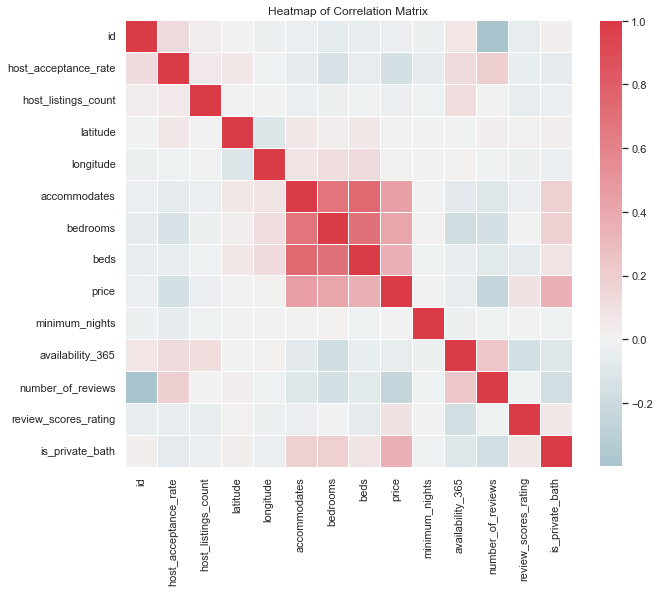

In [50]:
# Explore correlation matrix

corr_matrix = df.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

By the Heatmap of the features, we decide to drop variables have no relationship to price.

In [51]:
X = df.drop(columns=['price','host_since','id','longitude','latitude','minimum_nights'])
y = df.price.values

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_acceptance_rate  4999 non-null   int64  
 1   host_is_superhost     4999 non-null   object 
 2   host_listings_count   4999 non-null   int64  
 3   property_type         4999 non-null   object 
 4   room_type             4999 non-null   object 
 5   accommodates          4999 non-null   int64  
 6   bedrooms              4999 non-null   float64
 7   beds                  4999 non-null   float64
 8   availability_365      4999 non-null   int64  
 9   number_of_reviews     4999 non-null   int64  
 10  review_scores_rating  4999 non-null   float64
 11  instant_bookable      4999 non-null   object 
 12  is_private_bath       4999 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 507.8+ KB


In [53]:
X_old= pd.get_dummies(X, prefix=['is']*4)

In [54]:
X_old.shape

(4999, 20)

In [55]:
X_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_acceptance_rate  4999 non-null   int64  
 1   host_listings_count   4999 non-null   int64  
 2   accommodates          4999 non-null   int64  
 3   bedrooms              4999 non-null   float64
 4   beds                  4999 non-null   float64
 5   availability_365      4999 non-null   int64  
 6   number_of_reviews     4999 non-null   int64  
 7   review_scores_rating  4999 non-null   float64
 8   is_private_bath       4999 non-null   int64  
 9   is_F                  4999 non-null   uint8  
 10  is_T                  4999 non-null   uint8  
 11  is_Entire             4999 non-null   uint8  
 12  is_Other              4999 non-null   uint8  
 13  is_Private            4999 non-null   uint8  
 14  is_Entire home/apt    4999 non-null   uint8  
 15  is_Hotel room        

In [56]:
X_new = SelectKBest(chi2, k=15)
X_new.fit_transform(X_old, y)
cols = X_new.get_support(indices = True)
df_new = X_old.iloc[:,cols]

In [57]:
df_new

host_acceptance_rate  host_listings_count  accommodates  bedrooms  beds  \
0                      100                    1             2       1.0   2.0   
1                       78                    2             2       1.0   1.0   
2                      100                    1             2       1.0   1.0   
3                      100                    2             2       1.0   1.0   
4                      100                    2             1       1.0   1.0   
...                    ...                  ...           ...       ...   ...   
4994                     0                    0             4       1.0   2.0   
4995                    78                    0             4       2.0   2.0   
4996                    78                    0             4       2.0   3.0   
4997                    78                    0             4       2.0   3.0   
4998                    25                    0             4       2.0   2.0   

      availability_365  number_of_reviews  is_Entire  is_Other  is_Private  \
0                   70                285          0         0           1   
1                    0                339          0         0           1   
2                    8                226          0         0           1   
3                  238                370          0         0           1   
4                  267                520          0         0           1   
...                ...                ...        ...       ...         ...   
4994                28                  0          1         0           0   
4995               365                  0          1         0           0   
4996                13                  0          1         0           0   
4997               363                  0          0         0           1   
4998               349                  0          1         0           0   

      is_Entire home/apt  is_Hotel room  is_Private room  is_Shared room  \
0                      0              0                1               0   
1                      0              0                1               0   
2                      0              0                1               0   
3                      0              0                1               0   
4                      0              0                1               0   
...                  ...            ...              ...             ...   
4994                   1              0                0               0   
4995                   1              0                0               0   
4996                   1              0                0               0   
4997                   0              0                1               0   
4998                   1              0                0               0   

      is_True  
0           1  
1           1  
2           1  
3           0  
4           0  
...       ...  
4994        0  
4995        1  
4996        1  
4997        0  
4998        0  

[4999 rows x 15 columns]

We drop the columns with high correlation

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

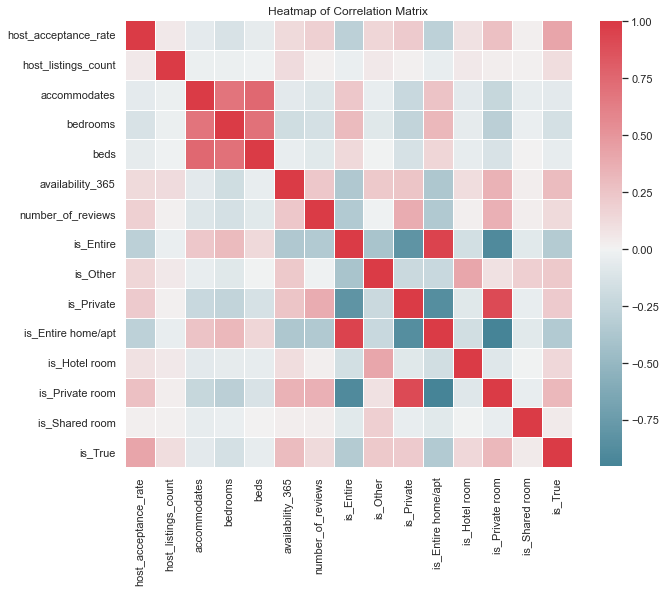

In [58]:
# Explore correlation matrix

corr_matrix = df_new.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

We check the VIF values to decide which feature has the high correlation.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [60]:
X_temp = df_new
calc_vif(X_temp)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



variables       VIF
0   host_acceptance_rate  1.268115
1    host_listings_count  1.022482
2           accommodates  2.619244
3               bedrooms  2.405643
4                   beds  2.738064
5       availability_365  1.286887
6      number_of_reviews  1.218445
7              is_Entire       inf
8               is_Other       inf
9             is_Private       inf
10    is_Entire home/apt       inf
11         is_Hotel room       inf
12       is_Private room       inf
13        is_Shared room       inf
14               is_True  1.382728

If VIF value bigger than 5, we consider their exist multicollinearity, therefore, we decide to remove these column.

In [61]:
X = df_new.drop(columns=['is_Shared room','is_Private room','is_Private','is_Entire home/apt','accommodates','bedrooms'])
y = y

In [62]:
calc_vif(X)

variables       VIF
0  host_acceptance_rate  5.769728
1   host_listings_count  1.055794
2                  beds  3.350705
3      availability_365  1.919026
4     number_of_reviews  1.548470
5             is_Entire  2.861968
6              is_Other  1.575582
7         is_Hotel room  1.233452
8               is_True  2.038687

### Build models using OLS regression to predict listing price
Here we split the dataset to training part and testing part.

In [63]:
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state=1)

In [64]:
#OLS
# create the model, use the OLS and fit functions
statsmod = sm.OLS(train_y, train_X)
statsres = statsmod.fit()
# Print out the statistics
print(statsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              2955.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:53:41   Log-Likelihood:                         -18711.
No. Observations:                3499   AIC:                                  3.744e+04
Df Residuals:                    3490   BIC:                                  3.750e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

By train test split, from both RMSE score, we conclude that there doesn't exist overfitting and underfitting. Also since rainbow test p-value = 0.6 > 0.05, therefore, we conclude that the model is linearity.

In [65]:
import statsmodels.api as sm
sm.stats.linear_rainbow(statsres)

(0.9870266530381682, 0.6074766874962813)

In [66]:
ypred = statsres.predict(train_X)
print(f'RMSE for training dataset is', rmse(train_y,ypred))

RMSE for training dataset is 50.83442727156764


In [67]:
y_test_pred = ypred = statsres.predict(test_X)
print(f'RMSE for testing dataset is', rmse(test_y,y_test_pred))

RMSE for testing dataset is 53.050754651940444


In [68]:
statsres.params

host_acceptance_rate     0.503117
host_listings_count     -0.101753
beds                    21.852993
availability_365         0.094710
number_of_reviews       -0.019408
is_Entire               75.135587
is_Other                38.922575
is_Hotel room          -11.516070
is_True                 -6.784567
dtype: float64

### Conclusion

In this project, we utilized the Airbnb data, a dataset consisting of a random sample of homes that have been booked in Amsterdam during December 2020. We aim to help the stakeholder to have a better understanding of data relating to the price of listings on their website. We aim to explore the dataset provided to gain insight into its usefulness in the listing assessment process. We also want to discover crucial factors that are largely affecting the listing prices. 

We first explore the data and performed explanatory data analysis, and we did feature selection on the attributes we have. We checked collinearity to ensure our model does not violate the linearly using heat map. We also utilized the k highest score to select features. We then utilized VIF to get rid of the attributes with high correlation. We also performed feature engineer on our data. We imputed missing data using different missing data imputation techniques and created dummy variables accordingly. We then built an OLS regression to predict listing price and performed diagnostics and goodness of fit tests to test our model. 

We use 9 variables to fit OLS models. Our model's R square is 0.884. We also split test and train and get the RMSE. The train RMSE is 50.83442727156764 and the train RMSE is 53.050754651940444. As they are close to each other we concluded that there is no overfitting problem. And we use the rainbow test to perform a diagnostics test to check the linearity. Our model passed linearity check. We also use R-squared to check the goodness of the model. R-squared of the model is 0.884. 

After fitting the OLS model, we have a deeper understanding of the factors affecting the housing price. 

The result we got in the OLS model aligns without assumptions. Our finding suggests that beds are one of the top features that are positively correlated with the listing prices. Compared to private room types, entire and other(treehouse, boathouse) are more positively related with listing prices. Among all room types, the entire is more positively related with the prices which indicate that an entire house is more expensive. Other room types are also positively related to the listing prices and we believe it might be because people tend to use Airbnb to seeking for special vocation experiences like boating and treehouse. 

Room situation also has a big impact on the housing price. Hotel room within room situation is specifically negatively associated with pricing. We believe it might be due to the reason that people using Airbnb for housing a looking for a room for the entire property for large groups of people. And people who want hotel standard services are less likely to use Airbnb for their housing choice.


We also found that the instantly bookable room generally has a lower price. We believe it is due to the reason that if a listing is instantly bookable, it represents the listing is not popular. 

The OLS model is a great choice for the listing data we have. The results and conclusions we found upon this model are interpretable and insightful. But as our model’s R square is not high enough, we proposed that there could be another model to get a better prediction for the price, for instance, decision tree and random forest.